### Load MNIST Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
d0 = pd.read_csv('../data/mnist_train.csv')
print(d0.head(5))

# save the label in variable l
l = d0['label']

# drop the label and store the pixel data in d
d = d0.drop("label", axis = 1)

d.head(5)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


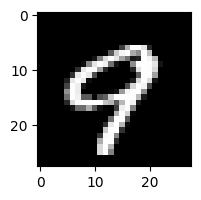

9


In [5]:
plt.figure(figsize = (2,2))
idx = 100

# Use .values instead of as_matrix()
grid_data = d.iloc[idx].values.reshape(28,28) # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])


### 2-D Visulization using PCA

In [6]:
# pick first 15k data-points to work on for time-efficiency.
# Exercise: Perform the same analysis on all of 42k data-points.

labels = l.head(15000)
data = d.head(15000)

print("The shape of sample data:- ", data.shape)

The shape of sample data:-  (15000, 784)


In [8]:
# Data-Preprocessing:- Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [9]:
# find the covariance matrix which is A^T* A

sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)
print("The shape of the variance matrix =", covar_matrix.shape)

The shape of the variance matrix = (784, 784)
(15000, 784)


In [10]:
# finding the top two eigen vectors and eigen-values 
# for projecting onto a 2-Dim space

from scipy.linalg import eigh

# the parameter: "eighvals" is defined (low value to high value)
# eigh function will return the eigen values in ascending order
# this code generates only the top 2(782 and 783) eigen values.
values, vectors = eigh(covar_matrix, subset_by_index = (782, 783))

print("Shape of eigen vectors = ", vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness for further computation.
vectors = vectors.T

print("Updated shape of eigen vectors = ", vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal.
# here the vectors[0] represent the eigen vector corresponding 2nd principal.

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [12]:
# projecting the original data sample on the plane
# formed by two principal eigen vectors by vector-vector multiplication

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print(" resultant new data points shape:- ", vectors.shape, "X", sample_data.T.shape, "=", new_coordinates.shape)

 resultant new data points shape:-  (2, 784) X (784, 15000) = (2, 15000)


In [13]:
import pandas as pd

# appending label to the 2nd projected data
new_coordinate = np.vstack((new_coordinates, labels)).T

# creating a new data frame for plotting the labeled points.
dataframe = pd.DataFrame(data = new_coordinate, columns = ("1st principal", "2nd principal", "label"))
print(dataframe.head())

   1st principal  2nd principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


C:\Users\NANDAN KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


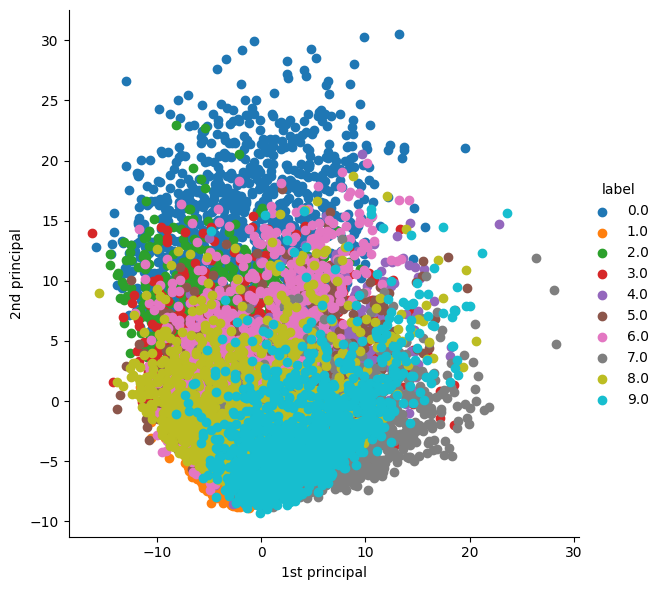

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt

# Assuming you have a dataframe with columns "1st principal", "2nd principal", and "label"
sn.FacetGrid(dataframe, hue="label", height = 6).map(plt.scatter, '1st principal', '2nd principal').add_legend()

plt.show()


### PCA using Scikit-learn

In [30]:
from sklearn import decomposition
pca = decomposition.PCA()

In [33]:
# configuring the parameters
# the number of componenets = 2
pca.n_componenets = 2
pca_data = pca.fit_transform(new_coordinates.T)

# pca_reduced will contain teh 2-d projects of sample data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


C:\Users\NANDAN KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


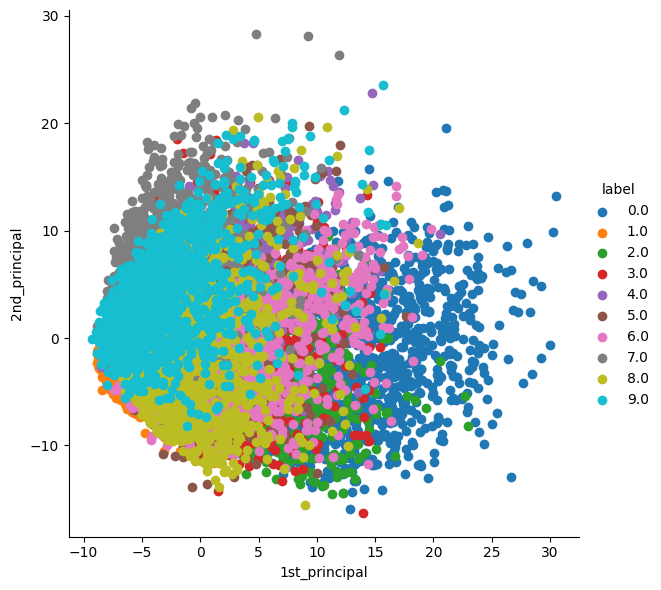

In [34]:
# attaching the label for each 2-d data point
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data frame which help us in plotting the result data
pca_df = pd.DataFrame(data = pca_data, columns = ("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue = "label", height = 6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [36]:
new_coordinates.T.shape

(15000, 2)

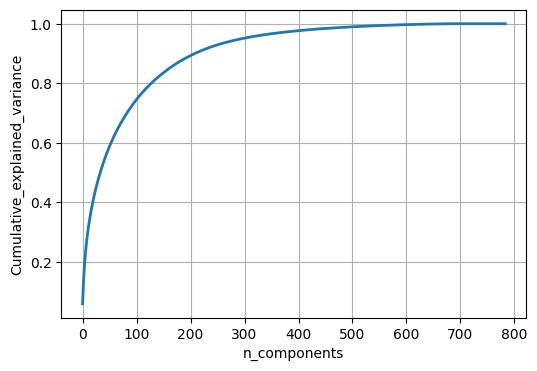

In [40]:
# PCA for dimensionality reduction (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize = (6,4))

plt.clf()
plt.plot(cum_var_explained, linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

# If we take 200 dimensions , approx 90% of variance is explained